# CENSO DO ENSINO SUPERIOR 2019 - INEP

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as npnp

p = 0.01

dataframe = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep="|"
)

dataframe.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2019,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2013
1,2019,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018
2,2019,1,1,1,2,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2017
3,2019,1,1,1,2,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
4,2019,1,1,1,2,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2013


In [3]:
dataframe.shape

(123418, 105)

In [4]:
dataframe.columns.values

array(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'CO_CURSO_POLO',
       'TP_TURNO', 'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO',
       'TP_NIVEL_ACADEMICO', 'CO_CINE_ROTULO', 'ID_ALUNO',
       'CO_ALUNO_CURSO', 'CO_ALUNO_CURSO_ORIGEM', 'TP_COR_RACA',
       'TP_SEXO', 'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO',
       'NU_DIA_NASCIMENTO', 'NU_IDADE', 'TP_NACIONALIDADE',
       'CO_PAIS_ORIGEM', 'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO',
       'IN_DEFICIENCIA', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL',
       'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ',
       'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
       'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO',
       'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER',
       'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO',
       'TP_SITUACAO', 'QT_CARGA_HORARIA_TOTAL', 'QT_CARGA_HORARIA_I

In [47]:
colunasSelecionadas = ['TP_SEXO', 'TP_COR_RACA', 'NU_IDADE', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'TP_CATEGORIA_ADMINISTRATIVA']

In [48]:
dadosSelecionados = dataframe.filter(items=colunasSelecionadas)

In [49]:
dadosSelecionados.head()

,TP_SEXO,TP_COR_RACA,NU_IDADE,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,TP_CATEGORIA_ADMINISTRATIVA
0,2,3,42,1,1
1,2,3,19,2,1
2,2,3,30,1,1
3,2,1,31,1,1
4,1,3,30,1,1


In [50]:
dadosSelecionados.shape

(123418, 5)

## ANÁLISE DA RAÇA DO CANDIDATO

In [36]:
colunaRaca = dadosSelecionados['TP_COR_RACA']

In [37]:
colunaRaca

0         3
1         3
2         3
3         1
4         3
         ..
123413    3
123414    3
123415    1
123416    1
123417    1
Name: TP_COR_RACA, Length: 123418, dtype: int64

---
- 0. Aluno não quis declarar cor/raça  
- 1. Branca
- 2. Preta
- 3. Parda
- 4. Amarela
- 5. Indígena
- 9. Não dispõe da informação (Não resposta)
---

In [38]:
colunaRaca.value_counts().sort_index()

0    22387
1    51766
2     8789
3    37440
4     2015
5      803
9      218
Name: TP_COR_RACA, dtype: int64

<AxesSubplot:>

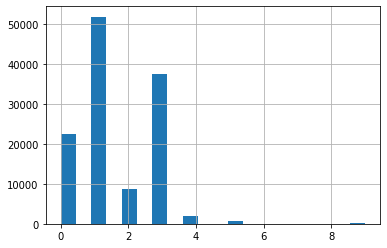

In [39]:
colunaRaca.hist(bins=20)

In [40]:
distInRaca = colunaRaca.value_counts()
percentInRaca = [100*x/distInRaca.sum() for x in distInRaca]
percentInRaca

[41.943638691276796,
 30.335931549692912,
 18.139169327002545,
 7.121327521107132,
 1.6326629827091672,
 0.6506344293376979,
 0.17663549887374613]

---
## ANÁLISE TIPO DE ESCOLA DE ENSINO MÉDIO

In [42]:
colunaEnsinoMedio = dadosSelecionados['TP_ESCOLA_CONCLUSAO_ENS_MEDIO']
colunaEnsinoMedio

0         1
1         2
2         1
3         1
4         1
         ..
123413    1
123414    1
123415    1
123416    1
123417    1
Name: TP_ESCOLA_CONCLUSAO_ENS_MEDIO, Length: 123418, dtype: int64

In [43]:
colunaEnsinoMedio.value_counts().sort_index()

1    88205
2    34647
9      566
Name: TP_ESCOLA_CONCLUSAO_ENS_MEDIO, dtype: int64

---
- 1. Pública
- 2. Privada                                                 
- 9. Não dispõe da informação (Não resposta)
---

<AxesSubplot:>

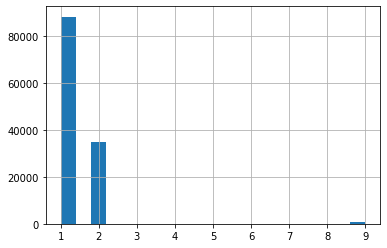

In [46]:
colunaEnsinoMedio.hist(bins=20)

In [51]:
distInEM = colunaEnsinoMedio.value_counts()
percentInEM = [100*x/distInEM.sum() for x in distInEM]
percentInEM

[71.46850540439806, 28.07289050219579, 0.4586040934061482]

## ANÁLISE DO TIPO DE INSTITUIÇÃO DE ENSINO SUPERIOR

In [52]:
colunaTipoIES = dadosSelecionados['TP_CATEGORIA_ADMINISTRATIVA']
colunaTipoIES

0         1
1         1
2         1
3         1
4         1
         ..
123413    2
123414    2
123415    2
123416    3
123417    2
Name: TP_CATEGORIA_ADMINISTRATIVA, Length: 123418, dtype: int64

In [53]:
colunaTipoIES.value_counts().sort_index()

1    16719
2     8211
3      786
4    68041
5    29340
7      321
Name: TP_CATEGORIA_ADMINISTRATIVA, dtype: int64

---
- 1. Pública Federal
- 2. Pública Estadual
- 3. Pública Municipal
- 4. Privada com fins lucrativos
- 5. Privada sem fins lucrativos
- 6. Privada - Particular em sentido estrito
- 7. Especial
- 8. Privada comunitária
- 9. Privada confessional
---

<AxesSubplot:>

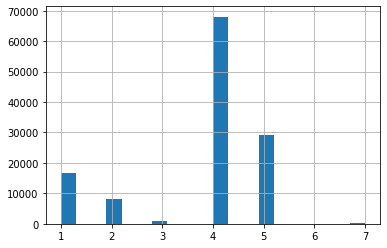

In [54]:
colunaTipoIES.hist(bins=20)

In [55]:
distInIES = colunaTipoIES.value_counts()
percentInIES = [100*x/distInIES.sum() for x in distInIES]
percentInIES

[55.130532013158536,
 23.77286943557666,
 13.546646356285144,
 6.653000372717107,
 0.6368601014438736,
 0.2600917208186812]

## TIPO ENSINO MÉDIO x TIPO DE IES

In [60]:
colunasAnalise = ['TP_CATEGORIA_ADMINISTRATIVA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO']
microdadosEMeIES = dataframe.filter(items=colunasAnalise)
microdadosEMeIES.head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
0,1,1
1,1,2
2,1,1
3,1,1
4,1,1


In [62]:
microdadosEMeIES = microdadosEMeIES.dropna()
microdadosEMeIES.head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
0,1,1
1,1,2
2,1,1
3,1,1
4,1,1


In [63]:
microdadosEMeIES.shape

(123418, 2)

In [64]:
microdadosEMeIES.groupby('TP_CATEGORIA_ADMINISTRATIVA').count()

,TP_ESCOLA_CONCLUSAO_ENS_MEDIO
TP_CATEGORIA_ADMINISTRATIVA,
1,16719
2,8211
3,786
4,68041
5,29340
7,321
